In [31]:
import pandas as pd
import matplotlib.pyplot as plt
from helpers import split_WoS_category

In [32]:
sample_n = 5

In [33]:
df = pd.read_csv('output/shared_citations.csv')
df['WoS Categories'] = df['WoS Categories'].apply(split_WoS_category)
df_exploded = df.explode('WoS Categories')
category_counts = pd.DataFrame(df_exploded['WoS Categories'].value_counts())
category_counts = category_counts.head(20)

In [34]:
df.shape

(476, 72)

In [35]:
df_exploded.shape

(910, 72)

In [36]:
category_counts = pd.DataFrame(category_counts).reset_index()

In [37]:
category_counts.sort_values(by='count', ascending=False, inplace=True)

In [38]:
category_counts = category_counts.head(10)
category_counts.sort_values(by='count', ascending=True, inplace=True)

<BarContainer object of 10 artists>

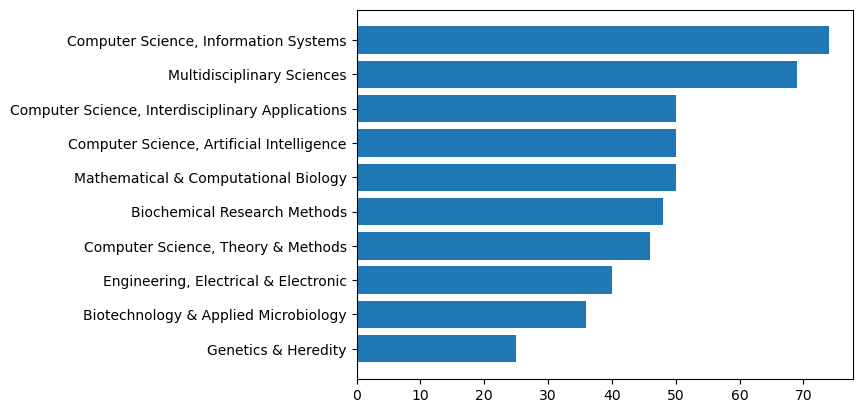

In [39]:
plt.barh(y=list(category_counts['WoS Categories']), width=category_counts['count'])
# plt.xticks(rotation=70)

In [40]:
sample = []
category_name_l = []

for i in range(10):
    category_name = category_counts['WoS Categories'][i]
    category_name_l.extend([category_name] * sample_n)
    sample.append(df_exploded.loc[(df_exploded['WoS Categories'] == category_name)].sample(n=sample_n, random_state=42))
    
sample_df = pd.concat(sample)
sample_df['Category Sampling Basis'] = category_name_l

In [41]:
sample_df.shape

(50, 73)

In [42]:
sample_df.drop_duplicates(inplace=True)

In [43]:
assert len(sample_df) == 50

In [44]:
sample_df.to_csv('output/sample_50_pub.csv', index=False)